# **Advertising Campaign Performance Dataset - Analysis Project**

# <mark> Importing Python Libraries </mark> 

Importing various libraries into projects allows easier readibility and gives us more functionality with our coding.

In [12]:
# A large library assisting with the analyzing, manipulating, and cleaning of Datasets.
import pandas as pd
# Allows us to create visual representations of our results from the anaysis.
import matplotlib.pyplot as plt
import seaborn as sns
# Provides functions to carry out high-level mathematics.
import numpy as np

# <mark> Cleaning and Validating Data </mark> 

Before we begin using and manipulating the data to answer our questions we need to make sure that the data is clean with no missing data/values and nothing inputed incorrectly. This ensures we come across less errors later on in the project.

First lets import the dataset and analysis the first 5 rows to have a feel of what we are working with!

In [16]:
campaign = pd.read_csv('ad_campaign_performance.csv')
display(campaign.head())

,Campaign_ID,Budget,Duration,Platform,Content_Type,Target_Age,Target_Gender,Region,Clicks,Conversions,CTR,CPC,Conversion_Rate,Success
0,CAMP-XAJI0Y,15895,39,Instagram,Video,35-44,Female,US,48297,2116,303.850267,0.329109,4.381225,1
1,CAMP-6DPBHS,960,8,LinkedIn,Video,45-54,Female,UK,15097,2340,1572.604167,0.063589,15.499768,1
2,CAMP-AHXTHV,38258,54,YouTube,Image,35-44,All,US,8134,2740,21.260913,4.703467,33.685763,1
3,CAMP-3A3ZMF,44832,28,Facebook,Text,25-34,Female,US,21801,4277,48.628212,2.056419,19.618366,1
4,CAMP-8MDD4V,11384,36,Google,Story,18-24,All,UK,16503,1488,144.966620,0.689814,9.016542,1


The data looks neat and tidy and I can't find any problems with the column names that might make them annoying to work with in the future. As such lets move on to looking for missing/misinputed data:

Lets check the datatypes to see if the panda library interpreted whether they were a string, int, etc:

In [19]:
display(campaign.dtypes)

Campaign_ID         object
Budget               int64
Duration             int64
Platform            object
Content_Type        object
Target_Age          object
Target_Gender       object
Region              object
Clicks               int64
Conversions          int64
CTR                float64
CPC                float64
Conversion_Rate    float64
Success              int64
dtype: object

Everything seems to be in the correct datatypes meaning there is most likely no misinputed data!

Just to make sure lets change any of the columns that are object datatypes that could be strings:

In [22]:
campaign['Region'] = campaign.Region.astype('string')
campaign['Target_Gender'] = campaign['Target_Gender'].astype('string')
campaign['Content_Type'] = campaign['Content_Type'].astype('string')
campaign['Platform'] = campaign.Platform.astype('string')
display(campaign.dtypes)

Campaign_ID                object
Budget                      int64
Duration                    int64
Platform           string[python]
Content_Type       string[python]
Target_Age                 object
Target_Gender      string[python]
Region             string[python]
Clicks                      int64
Conversions                 int64
CTR                       float64
CPC                       float64
Conversion_Rate           float64
Success                     int64
dtype: object

Perfect! There were no errors when attempting to change the datatypes meaning there were no misinputed values. 

Next lets check to see if there are any null values to conclude our clean & validation:

In [25]:
display(campaign.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Campaign_ID      1000 non-null   object 
 1   Budget           1000 non-null   int64  
 2   Duration         1000 non-null   int64  
 3   Platform         1000 non-null   string 
 4   Content_Type     1000 non-null   string 
 5   Target_Age       1000 non-null   object 
 6   Target_Gender    1000 non-null   string 
 7   Region           1000 non-null   string 
 8   Clicks           1000 non-null   int64  
 9   Conversions      1000 non-null   int64  
 10  CTR              1000 non-null   float64
 11  CPC              1000 non-null   float64
 12  Conversion_Rate  1000 non-null   float64
 13  Success          1000 non-null   int64  
dtypes: float64(3), int64(5), object(2), string(4)
memory usage: 109.5+ KB


None

There are no null values that we could find so we will move onto gathering our conclusions!

# <mark> Distribution of the Dataset </mark> 

In this section we are going to take a look into how the information in the dataset is distributed. For example, are more campaigns targeted at males, females, or both? Or maybe what seems to be the platform marketers use more?

First lets start with a simple one, lets create a graph to checkout the **distribution of what sex the campaigns are targeted towards**:

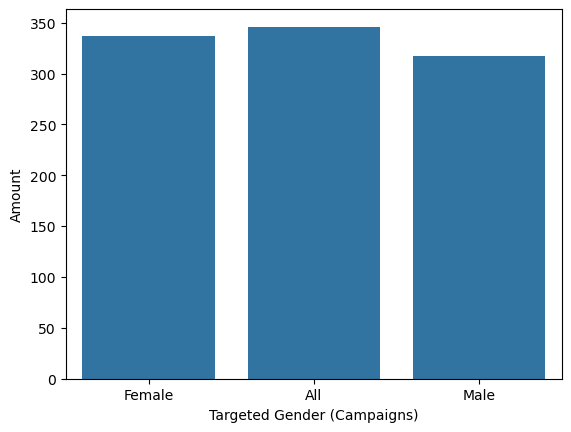

Target_Gender
All       346
Female    337
Male      317
Name: count, dtype: Int64

<Figure size 640x480 with 0 Axes>

In [30]:
sns.countplot(data=campaign, x='Target_Gender')
plt.xlabel('Targeted Gender (Campaigns)')
plt.ylabel('Amount')
plt.show()
plt.clf()
print('')
display(campaign['Target_Gender'].value_counts())

We can see that the campaigns are distributed relatively evenly with more campaigns being targeted at Females or both genders.

Next lets take a look at the **distribution of targeted age groups**:

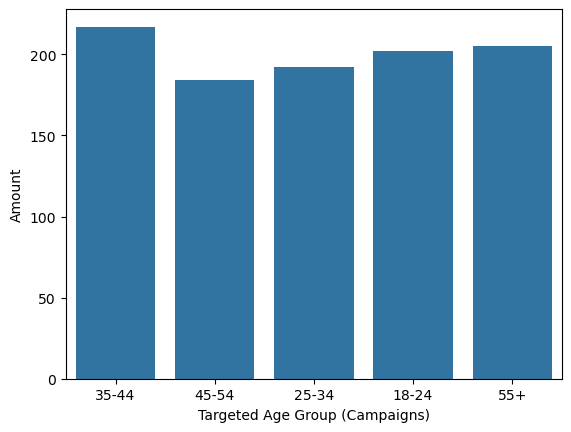

Target_Age
35-44    217
55+      205
18-24    202
25-34    192
45-54    184
Name: count, dtype: int64

<Figure size 640x480 with 0 Axes>

In [33]:
sns.countplot(data=campaign, x='Target_Age')
plt.xlabel('Targeted Age Group (Campaigns)')
plt.ylabel('Amount')
plt.show()
plt.clf()
print('')
display(campaign['Target_Age'].value_counts())

Once again the distribution is fairly even across all age groups with the age of 35 - 44 being the main target (Suprising, thought it would be younger audiences)

Next lets take a look at the **distribution of the regions**:

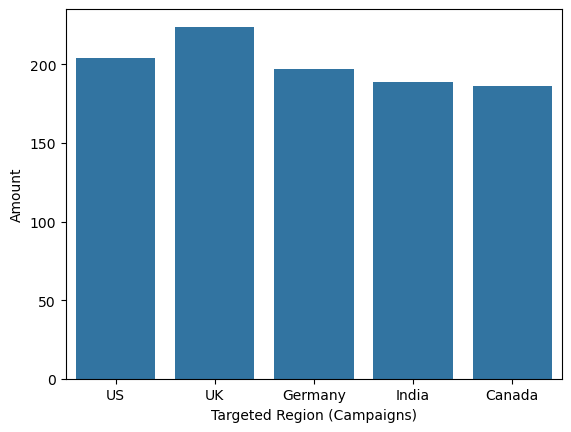

Region
UK         224
US         204
Germany    197
India      189
Canada     186
Name: count, dtype: Int64

<Figure size 640x480 with 0 Axes>

In [36]:
sns.countplot(data=campaign, x='Region')
plt.xlabel('Targeted Region (Campaigns)')
plt.ylabel('Amount')
plt.show()
plt.clf()
print('')
display(campaign['Region'].value_counts())

The data is less evenly distributed compared to the previous columns, however it is still distributed quite evenly with UK being the main targeted region!

Next is the **distribution of the platform used** (Hopefully this gives us a slight insight into what platform marketers prefer for campaigns?):

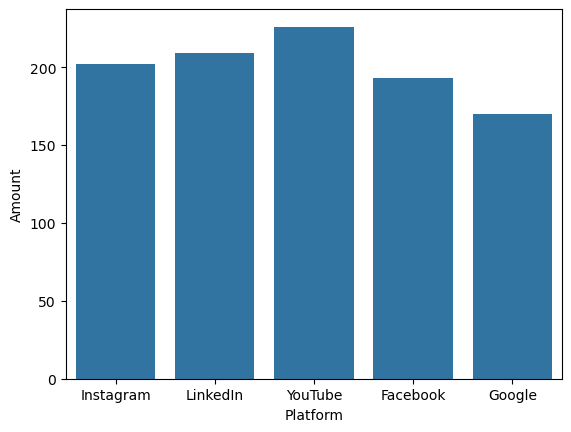

Platform
YouTube      226
LinkedIn     209
Instagram    202
Facebook     193
Google       170
Name: count, dtype: Int64

<Figure size 640x480 with 0 Axes>

In [39]:
sns.countplot(data=campaign, x='Platform')
plt.xlabel('Platform')
plt.ylabel('Amount')
plt.show()
plt.clf()
print('')
display(campaign['Platform'].value_counts())

Marketers seem to prefer Youtube over the other platforms which makes me wonder which one actually produces the most results? (Is google really that bad i wonder?)

Lastly, whats the **distribution of the content type**?

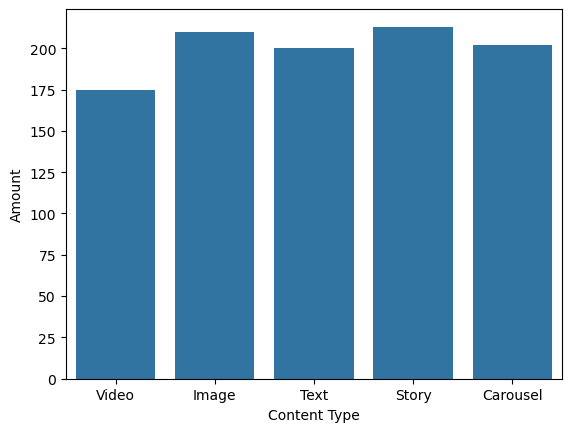

Content_Type
Story       213
Image       210
Carousel    202
Text        200
Video       175
Name: count, dtype: Int64

<Figure size 640x480 with 0 Axes>

In [42]:
sns.countplot(data=campaign, x='Content_Type')
plt.xlabel('Content Type')
plt.ylabel('Amount')
plt.show()
plt.clf()
print('')
display(campaign['Content_Type'].value_counts())

I would've thought that it would be videos! But I was completely wrong (probably why I'm not a marketer!), stories seem to be the prefered way of advertising a campaign which is extremely interesting since I would think that most people would just skip past a story?

# <mark> Gaining Conclusions & Insights </mark> 

At last we reach the most interesting (and hopefully helpful) part of this project, the answers to the questions!

## <mark> Question 1: What platform produces the best results? </mark> 

We can find the answer to this question relatively simpily (For me atleast), we just need to compare the average conversion rates for each platform.

First lets create a new dataframe containing the data we need:

In [49]:
best_platform = campaign[['Platform','Conversion_Rate']]
display(best_platform.head(6))

,Platform,Conversion_Rate
0,Instagram,4.381225
1,LinkedIn,15.499768
2,YouTube,33.685763
3,Facebook,19.618366
4,Google,9.016542
5,LinkedIn,7.653011


Next lets organize our data by, 1. Combining the double-ups of the platforms and 2. Gathering the average of those double-ups:

In [51]:
best_platform = best_platform.groupby('Platform').mean()
display(best_platform)

,Conversion_Rate
Platform,
Facebook,18.927101
Google,21.823443
Instagram,20.753952
LinkedIn,31.435274
YouTube,38.636276


Now that our data is prepared and we can see the conversion rates for each platform lets convert it into a graph so we can visually see the difference in values!

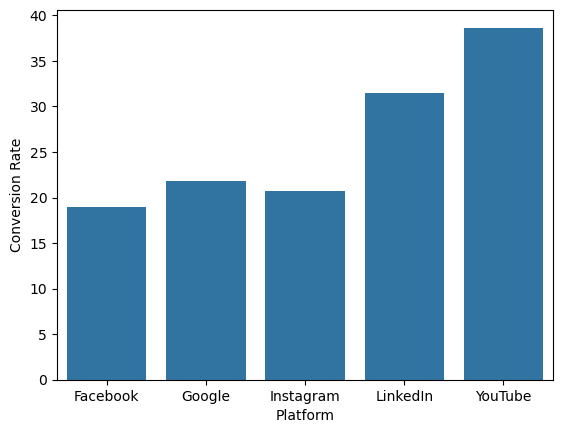

<Figure size 640x480 with 0 Axes>

In [53]:
sns.barplot(data=best_platform,x='Platform', y='Conversion_Rate')
plt.xlabel('Platform')
plt.ylabel('Conversion Rate')
plt.show()
plt.clf()

Here we can see clearly that youtube produced the best results, it now makes sense why marketers liked investing in YouTube so much! 

However, the marketers decided to invest more into Instagram and Facebook compared to google even though google had produced better results.

## <mark> Question 2: What Content Type produced better results? </mark> (E.g. Video)

Just like the previous question we need to start by creating a new dataframe:

In [58]:
best_content = campaign[['Content_Type','Conversion_Rate']]
display(best_content.head())

,Content_Type,Conversion_Rate
0,Video,4.381225
1,Video,15.499768
2,Image,33.685763
3,Text,19.618366
4,Story,9.016542


Now that we have selected the two columns that we require lets begin by adding the average conversion rate of all the content type double ups:

In [60]:
best_content = best_content.groupby('Content_Type').mean()
display(best_content)

,Conversion_Rate
Content_Type,
Carousel,15.371897
Image,31.276156
Story,34.399185
Text,33.294561
Video,18.273886


Sweet! We can now see the difference in conversion rate for all of the different content types, lets create a graph to visualize these values easier:

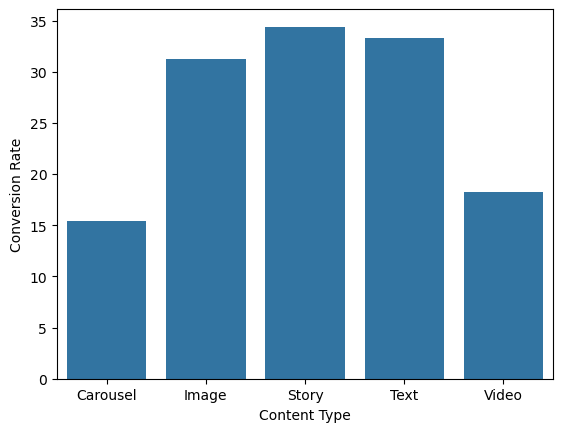

<Figure size 640x480 with 0 Axes>

In [62]:
sns.barplot(data=best_content, x='Content_Type', y='Conversion_Rate')
plt.xlabel('Content Type')
plt.ylabel('Conversion Rate')
plt.show()
plt.clf()

The results are very similar to their distribution. However, the marketers produced more campaigns as Carousels compared to Videos even though the videos produced better results!

## <mark> Question 3: </mark>Is there a correlation between the duration of the campaign and its results?

To start lets create a new dataframe containing only the duration and conversion rate columns:

In [66]:
correlation_duration = campaign[['Duration','Conversion_Rate']]
display(correlation_duration.head())

,Duration,Conversion_Rate
0,39,4.381225
1,8,15.499768
2,54,33.685763
3,28,19.618366
4,36,9.016542


Next lets create a scatter plot to visualize all these values and see if we can notice any patterns!

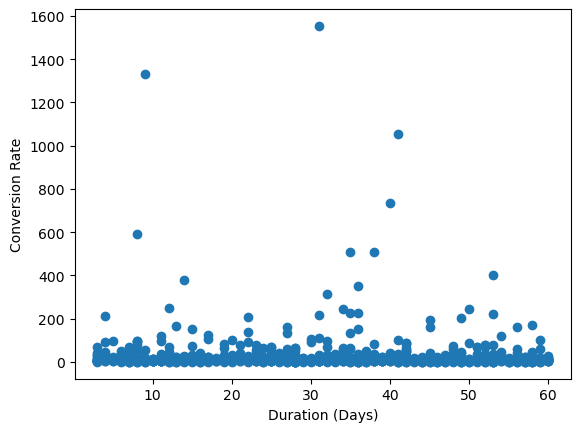

<Figure size 640x480 with 0 Axes>

In [68]:
plt.scatter(data=correlation_duration,x='Duration',y='Conversion_Rate')
plt.xlabel('Duration (Days)')
plt.ylabel('Conversion Rate')
plt.show()
plt.clf()

The bulk of the results are towards the bottom meaning there is probably not a large relationship between the two variables, however there are some points where it seems to shoot up (around 30 day mark) meaning there may be a linear association?

Lets find out using pearsons correlation:

In [71]:
from scipy.stats import pearsonr
corr_conversion_duration, p = pearsonr(correlation_duration.Duration,correlation_duration.Conversion_Rate)
display(corr_conversion_duration)

-0.020438816822208612

There is not a high enough linear association for their to be a correlation between the two varables, perhaps there is a different pattern here (Doesnt seem like it)?

## <mark>Question 4:</mark> Is there a correlation between a campaigns budget and its results?

First we can begin by creating a new dataframe containing only the necessary information (Budget, and Conversion_Rate):

In [75]:
budget_result = campaign[['Budget','Conversion_Rate']]
display(budget_result.head())

,Budget,Conversion_Rate
0,15895,4.381225
1,960,15.499768
2,38258,33.685763
3,44832,19.618366
4,11384,9.016542


Next lets create a scatterplot to visualize this data:

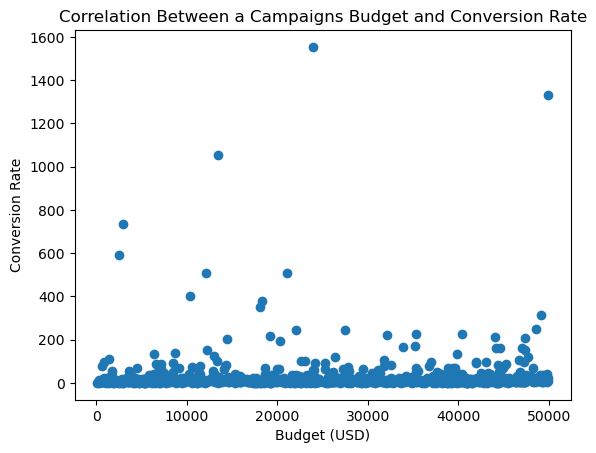

<Figure size 640x480 with 0 Axes>

In [102]:
plt.scatter(data=budget_result,x='Budget',y='Conversion_Rate')
plt.title('Correlation Between a Campaigns Budget and Conversion Rate')
plt.xlabel('Budget (USD)')
plt.ylabel('Conversion Rate')
plt.show()
plt.clf()

I cant see much of a correlation between the two variables at all, however its probably best that we dig a little deeper to consolidate our insights.

Lets check for a linear association between the two variables using pearsons correlation:

In [110]:
corr_budget_result, p = pearsonr(budget_result.Budget,budget_result['Conversion_Rate'])
display(corr_budget_result)

0.01903249945869586

This aligns with what we saw in the scatter plot before, a pearsons correlation of ~0.02 is nowhere near enough to consider there being a correlation between the two variables.

This tells us that just because you invest more money into a campaign doesnt neccesarily mean you will produce better results!

## Question 5: